# Check sync process

In [ ]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [ ]:
import datetime
import pathlib
import numpy as np
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


from u19_pipeline.ephys_pipeline import ephys_element, probe_element, get_session_directory
# import u19_pipeline.ephys_sync as ephys
import u19_pipeline.acquisition as acquisition
import datajoint as dj

import u19_pipeline.utils.DemoReadSGLXData.readSGLX as readSGLX
import u19_pipeline.utils.ephys_utils as ephys_utils

ModuleNotFoundError: No module named 'element_array_ephys'

### Read nidaq file and behavior data

In [14]:
session_dir = pathlib.Path('//cup.pni.princeton.edu/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya054/20251012_g0/ya054_20251012_g0/')
#session_dir = pathlib.Path('/Users/alvaros/Documents/MATLAB/BrainCogsProjects/CalciumImagingData/test_g0/')




nidq_bin_full_path = list(session_dir.glob('*obx.bin*'))[0]

#Nidaq file
nidq_meta          = readSGLX.readMeta(nidq_bin_full_path)

print(nidq_meta)
#nidq_sampling_rate = readSGLX.SampRate(nidq_meta)
digital_array      = ephys_utils.spice_glx_utility.load_spice_glx_digital_file(nidq_bin_full_path, nidq_meta, d_line_list=[0,3])




{'acqXaDwSy': '2,1,1', 'appVersion': '20250325', 'fileCreateTime': '2025-10-12T17:25:02', 'fileName': 'C:/SGL_DATA/ya054_20251012_g0/ya054_20251012_g0_t0.obx0.obx.bin', 'fileSHA1': '65B0AC0A182C0CFA77B284E6F39D962E8A96BBBB', 'fileSizeBytes': '909635296', 'fileTimeSecs': '3752.2455661704325', 'firstSample': '2389422', 'gateMode': 'Immediate', 'imDatApi': '3.70.3', 'imDatBs_fw': '3.3.134', 'imDatBsc_fw': '0.0.0', 'imDatBsc_hw': '5.4', 'imDatBsc_pn': 'NPOB_ACQ_00-05-04', 'imDatBsc_sn': '23190188', 'imDatObx_slot': '20', 'imErrFlags0_IS_CT_SR_LK_PP_SY_MS': '0 0 0 0 0 0 0', 'imTrgRising': 'true', 'imTrgSource': '0', 'nDataDirs': '1', 'nSavedChans': '4', 'obAiRangeMax': '5', 'obAiRangeMin': '-5', 'obMaxInt': '32768', 'obSampRate': '30303.030543933055', 'snsSaveChanSubset': 'all', 'snsXaDwSy': '2,1,1', 'syncSourceIdx': '3', 'syncSourcePeriod': '1', 'trigMode': 'Immediate', 'typeImEnabled': '1', 'typeNiEnabled': '0', 'typeObEnabled': '1', 'typeThis': 'obx', 'userNotes': 'MD today, grounded hea

In [15]:
digital_array

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], shape=(2, 113704412), dtype=uint8)

In [16]:
plt.plot(digital_array[0,:])

MemoryError: Unable to allocate 1.69 GiB for an array with shape (2, 113704412) and data type float64

<Figure size 640x480 with 1 Axes>

In [18]:
trial_start_idx = (np.where(np.diff(digital_array[0,:]) == 1))
len(trial_start_idx[0])

180836

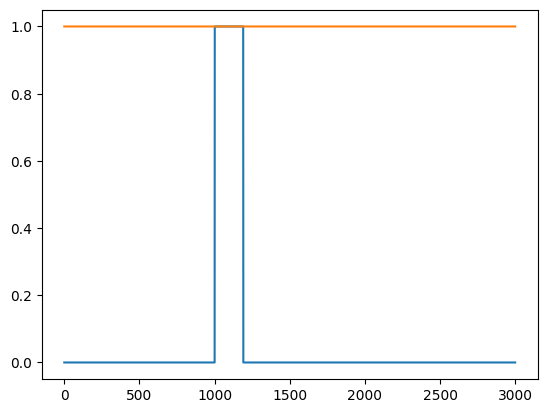

In [11]:
plt.plot(digital_array[0,trial_start_idx[0][0]-1000:trial_start_idx[0][0]+2000])
plt.plot(digital_array[1,trial_start_idx[0][0]-1000:trial_start_idx[0][0]+2000])

In [12]:
digital_array

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [13]:
thissession

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,block block number,"trial_idx trial index, keep the original number in the file","trial_type answer of this trial, left or right","choice choice of this trial, left or right",trial_abs_start absolute start time of the trial realtive to the beginning of the session,cue_presence_left boolean vector for the presence of the towers on the left,cue_presence_right boolean vector for the presence of the towers on the right,cue_onset_left onset time of the cues on the left (only for the present ones),cue_onset_right onset time of the cues on the right (only for the present ones),cue_offset_left offset time of the cues on the left (only for the present ones),cue_offset_right offset time of the cues on the right (only for the present ones),cue_pos_left position of the cues on the left (only for the present ones),cue_pos_right position of the cues on the right (only for the present ones),trial_duration duration of the entire trial,excess_travel metric that indicates if mice travelled on a straight line,i_arm_entry the index of the time series when the mouse enters the arm part,i_blank the index of the time series when the mouse enters the blank zone,i_cue_entry the index of the time series when the mouse neters the cue zone,i_mem_entry the index of the time series when the mouse enters the memory zone,i_turn_entry the index of the time series when the mouse enters turns,iterations length of the meaningful recording,trial_id,trial_prior_p_left prior probablity of this trial for left,vi_start,"trial_time time series of this trial, start from zero for each trial",collision boolean vector indicating whether the subject hit the maze on each time point,"position 3d recording of the position of the mouse, length equals to interations","velocity 3d recording of the velocity of the mouse, length equals to interations",sensor_dots raw recordings of the ball
jjulian_jj046,2022-04-19,0,2,1,L,L,0.314472,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,20.4824,0.0554246,1116,0,722,760,1116,1209,-4,0.5,2,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,2,L,L,20.7969,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,18.9399,-0.131662,1022,0,408,458,1022,1110,1,0.5,1438,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,3,R,R,39.7367,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,17.0181,-0.0978048,829,0,450,485,829,975,2,0.5,2775,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,4,L,L,56.7549,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,16.3938,-0.130909,763,0,394,430,763,922,3,0.5,3976,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,5,R,R,73.1487,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,14.6342,-0.152547,744,0,342,372,744,789,9,0.5,5123,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,6,L,L,87.7829,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,16.5865,-0.121202,794,0,358,390,794,946,4,0.5,6140,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,7,L,L,104.369,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,24.9804,-0.107094,1435,0,1064,1095,1435,1551,1,0.5,7311,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,8,R,L,129.35,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,23.723,-0.122898,755,0,428,462,755,903,13,0.5,9089,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,9,R,R,153.073,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,18.1598,-0.0141309,913,0,522,557,913,1057,5,0.5,10814,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,10,R,R,171.233,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,13.6427,-0.152834,668,0,358,384,668,707,6,0.5,12099,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [9]:
digital_array.shape

(8, 28729751)

### Get samples and times where trials and iterations start

In [5]:
mode = None   #Default for sessions before 12/01/2021
#mode = 'pulses'    #Default for sessions after 12/01/2021
iteration_dict = ephys_utils.get_iteration_sample_vector_from_digital_lines_pulses(digital_array[1,:], digital_array[2,:], nidq_sampling_rate, behavior_time.shape[0], behavior_time, mode=mode)
#                             get_iteration_sample_vector_from_digital_lines_pulses(trial_pulse_signal, iteration_pulse_signal,


# Check # of trials and iterations match
trial_count_diff, trials_diff_iteration_big, trials_diff_iteration_small = ephys_utils.assert_iteration_samples_count(iteration_dict['iter_start_idx'], behavior_time)

print(trial_count_diff)
print(trials_diff_iteration_big)
print(trials_diff_iteration_small)


status = ephys_utils.evaluate_sync_process(trial_count_diff, trials_diff_iteration_big, trials_diff_iteration_small)


in get_trial_signal_mode
iteration_pulse_signal_trial (654040,)
trial_iterations (1782, 1)
trial_iterations type <class 'numpy.ndarray'>
iter_samples 1782
behavior_time_vector_trial 1782
mode deduction:  pulse_signal
1
1782
1782
2
619
619
3
590
590
4
890
892
5
1274
1274
6
812
812
7
867
867
8
563
563
9
667
667
10
698
698
11
643
643
12
635
635
13
640
640
14
1283
1283
15
1301
1301
16
746
746
17
1226
1226
18
610
610
19
1292
1292
20
1173
1173
21
1257
1257
22
992
992
23
856
856
24
1568
1568
25
1343
1343
26
630
630
27
1275
1275
28
1696
1696
29
1274
1274
30
751
751
31
1191
1191
32
577
577
33
620
620
34
777
777
35
654
654
36
624
624
37
667
667
38
745
745
39
570
570
40
1174
1174
41
712
712
42
1104
1104
43
1981
1981
44
682
682
45
1752
1752
46
441
441
47
5006
5006
48
1384
1384
49
1278
1278
50
1712
1712
51
3061
3061
52
679
679
53
540
540
54
593
593
55
1164
1164
56
616
616
57
694
694
58
1135
1135
59
1261
1261
60
1170
1170
61
1183
1183
62
710
710
63
820
820
64
557
557
65
536
536
66
606
606
67
714
714

In [7]:
iteration_dict.keys()

dict_keys(['framenumber_vector_samples', 'trialnumber_vector_samples', 'iter_start_idx', 'iter_times_idx'])

In [11]:
it_times = iteration_dict['iter_times_idx'][trials_diff_iteration_small[0]]
beh_times = behavior_time[trials_diff_iteration_small[0]].flatten()

In [16]:
if it_times.shape[0] >= beh_times.shape[0]:
    print('More pulses than behavior iterations, check other method')
else:
    diff_vector = np.diff(it_times - beh_times[:it_times.shape[0]])

import scipy
peaks, _ = scipy.signal.find_peaks(diff_vector, height=0.05, distance=20)
peaks

array([658, 734])

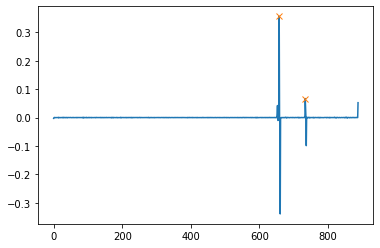

In [14]:
plt.plot(diff_vector)
plt.plot(peaks, diff_vector[peaks], "x")
plt.show()

In [21]:
difo_iters = np.diff(iteration_dict['iter_start_idx'][trials_diff_iteration_small[0]])
peaks2, _ = scipy.signal.find_peaks(difo_iters, height=1500, distance=20)

In [24]:
original_iter = iteration_dict['iter_start_idx'][trials_diff_iteration_small[0]]
new_iter_start = iteration_dict['iter_start_idx'][trials_diff_iteration_small[0]]

for i in range(peaks.shape[0]):
    value_insert = (original_iter[peaks[i]] + original_iter[peaks[i]+1] ) /2
    new_iter_start = np.insert(new_iter_start, peaks[i], value_insert)


if new_iter_start.shape[0] != beh_times[:it_times.shape[0]]:
    print('with peak strategy, could not find correct missing iterations')


892

In [30]:
so = np.empty(0)
so.shape

(0,)

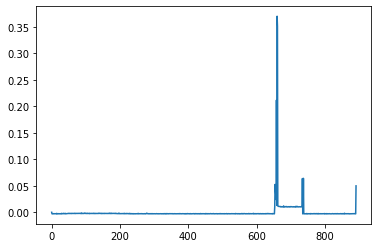

In [25]:
times = new_iter_start/nidq_sampling_rate
times = times - times[0]
new_diff_times = times - beh_times
plt.plot(new_diff_times)

In [28]:
beh_times[-5:]

array([12.291347, 12.304482, 12.31789 , 12.331045, 12.344059],
      dtype=float32)

In [22]:
print(iteration_dict.keys())
so = np.where(iteration_dict['trialnumber_vector_samples'] == 12)

print(so[0])


dict_keys(['framenumber_vector_samples', 'trialnumber_vector_samples', 'iter_start_idx', 'iter_times_idx'])
[1212738 1212739 1212740 ... 1292073 1292074 1292075]


### Plot signals around start of a trial

time from niDAQ 41.01721652828713
time behavior [40.958096]
samples nidaq 1025429
iter nidaq (2705,)
iter_virmen (2704, 1)


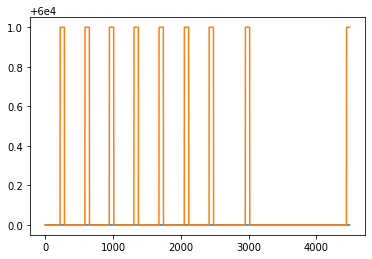

In [41]:
trial_plot = 280
samp_before = 3000
start_iter = 2704
end_iter = 2704
samp_after = 60000

plt.plot(digital_array[1,iteration_dict['iter_start_idx'][trial_plot][start_iter]-samp_before:iteration_dict['iter_start_idx'][trial_plot][end_iter]]+samp_after)
plt.plot(digital_array[2,iteration_dict['iter_start_idx'][trial_plot][start_iter]-samp_before:iteration_dict['iter_start_idx'][trial_plot][end_iter]]+samp_after)


iter_nidaq = (iteration_dict['iter_start_idx'][trial_plot][-1]-iteration_dict['iter_start_idx'][trial_plot][0])
time = iter_nidaq/nidq_sampling_rate
iter_virmen = time*120

print('time from niDAQ', time)
print('time behavior', behavior_time[trial_plot][-1])

print('samples nidaq', iter_nidaq)
print('iter nidaq', iteration_dict['iter_start_idx'][trial_plot].shape)
print('iter_virmen',behavior_time[trial_plot].shape)

time from niDAQ 41.01721652828713
time behavior [40.958096]
samples nidaq 1025429
iter nidaq (2705,)
iter_virmen (2704, 1)


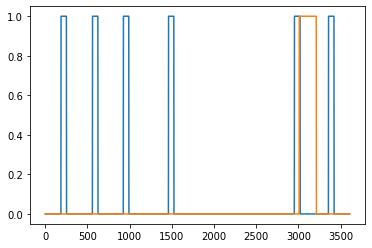

In [54]:
trial_plot = 280
samp_before = 3000
start_iter = 2704
samp_after = 600

plt.plot(digital_array[2,iteration_dict['iter_start_idx'][trial_plot][start_iter]-samp_before:iteration_dict['iter_start_idx'][trial_plot+1][0]+samp_after])
plt.plot(digital_array[1,iteration_dict['iter_start_idx'][trial_plot][start_iter]-samp_before:iteration_dict['iter_start_idx'][trial_plot+1][0]+samp_after])


iter_nidaq = (iteration_dict['iter_start_idx'][trial_plot][-1]-iteration_dict['iter_start_idx'][trial_plot][0])
time = iter_nidaq/nidq_sampling_rate
iter_virmen = time*120

print('time from niDAQ', time)
print('time behavior', behavior_time[trial_plot][-1])

print('samples nidaq', iter_nidaq)
print('iter nidaq', iteration_dict['iter_start_idx'][trial_plot].shape)
print('iter_virmen',behavior_time[trial_plot].shape)

In [44]:
trial_plot = 280
print(iteration_dict['iter_start_idx'][trial_plot][2704])
print(iteration_dict['iter_start_idx'][trial_plot+1][0])

97225703
97225711


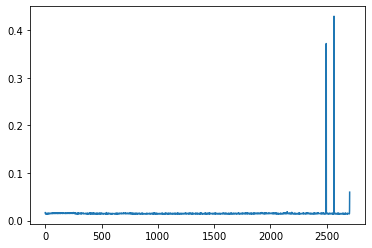

In [23]:
plt.plot(np.diff(iteration_dict['iter_start_idx'][trial_plot]/nidq_sampling_rate))

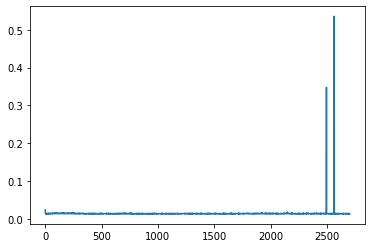

In [36]:
plt.plot(np.diff(behavior_time[trial_plot].flatten()))

In [34]:
print(behavior_time[trial_plot].flatten())

[0.0000000e+00 2.4555599e-02 3.8950201e-02 ... 4.0928226e+01 4.0943489e+01
 4.0958096e+01]


### Plot average time differences between behavior file and nidaq time

In [18]:
x = np.array([])
mean_x = np.array([])
for i in range(iteration_dict['iter_times_idx'].shape[0]-1):
    s = behavior_time[i].flatten()-iteration_dict['iter_times_idx'][i]
    mean_time_trial = np.mean(s)
    x = np.append(x,s, axis=0)
    mean_x = np.append(mean_x, mean_time_trial)

#plt.plot(x)
plt.plot(mean_x)


ValueError: operands could not be broadcast together with shapes (2704,) (2705,) 

### Test BehaviorSync insertion

In [4]:
ephys.BehaviorSync.populate(key)

nChan: 1, nFileSamp: 18400502
1
1436
1436
2
1337
1337
3
1201
1201
4
1147
1147
5
1017
1017
6
1171
1171
7
1778
1778
8
1725
1725
9
1285
1285
10
935
935
11
1008
1008
12
904
904
13
1149
1149
14
1105
1105
15
976
976
16
1210
1210
17
1088
1088
18
1090
1090
19
1190
1190
20
1025
1025
21
1645
1645
22
1816
1816
23
1859
1859
24
1854
1854
25
1630
1630
26
1022
1022
27
1048
1048
28
997
997
29
1080
1080
30
979
979
31
1047
1047
32
1021
1021
33
1022
1022
34
1082
1082
35
1105
1105
36
1013
1013
37
1786
1786
38
3131
3131
39
985
985
40
1150
1150
41
3314
3314
42
1003
1003
43
1670
1670
44
1713
1713
45
1750
1750
46
1780
1780
47
1750
1750
48
1108
1108
49
1609
1609
50
1312
1312
51
1662
1662
52
1458
1458
53
1049
1049
54
1124
1124
55
1625
1625
56
1339
1339
57
1083
1083
58
1104
1104
59
1046
1046
60
1289
1289
61
1180
1180
62
1167
1167
63
1102
1102
64
1784
1784
65
2114
2114
66
1514
1514
67
1145
1145
68
1056
1056
69
1020
1020
70
1002
1002
71
1206
1206
72
1036
1036
73
1057
1057
74
1000
1000
75
1066
1066
76
1114
1114
77


In [5]:
ephys.BehaviorSync()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,nidq_sampling_rate sampling rate of behavioral iterations niSampRate in nidq meta file,iteration_index_nidq length of this longblob should be the number of iterations in the behavior recording,trial_index_nidq length of this longblob should be the number of iterations in the behavior recording
hnieh_E105,2021-01-15,0,5000.08,=BLOB=,=BLOB=
jjulian_jj042,2021-10-31,0,5000.06,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,5000.06,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-14,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-15,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-16,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-17,0,5000.06,=BLOB=,=BLOB=
jjulian_jj049,2022-01-14,0,5000.06,=BLOB=,=BLOB=
jjulian_jj049,2022-01-15,0,5000.06,=BLOB=,=BLOB=
